In [37]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as im
import os
from skimage import io
from scipy import ndimage

img = io.imread(os.path.join("lena_cover.jpg"), as_grey=True)
#img = im.imread('./lena.jpg')
filter1 = 1/16*np.matrix([[1, 2, 1],[2, 4, 2],[1, 2, 1]])
filter2 = 1/5*np.matrix([[0, 1, 0],[1, 1, 1],[0, 1, 0]])
filter4 = np.matrix([[-1, -2, -1],[-2, 12, -2],[-1, -2, -1]])
filter5 = np.matrix([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])


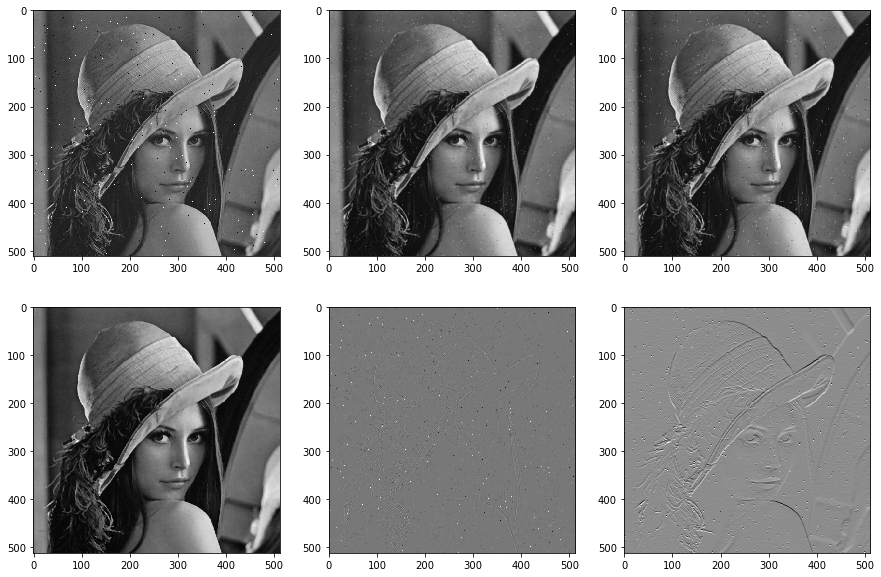

In [39]:
#Implementing salt and pepper noise
s_vs_p = 0.5
amount = 0.004
out = np.copy(img)
# Salt mode
num_salt = np.ceil(amount * img.size * s_vs_p)
coords = [np.random.randint(0, i - 1, int(num_salt))
        for i in img.shape]
out[coords] = 1
# Pepper mode
num_pepper = np.ceil(amount* img.size * (1. - s_vs_p))
coords = [np.random.randint(0, i - 1, int(num_pepper))
         for i in img.shape]
out[coords] = 0

flt1 = ndimage.convolve(out, filter1, mode='reflect', cval=0.0)
flt2 = ndimage.convolve(out, filter2, mode='reflect', cval=0.0)
flt3 = ndimage.median_filter(img, 3)
flt4 = ndimage.convolve(out, filter4, mode='reflect', cval=0.0)
flt5 = ndimage.convolve(out, filter5, mode='reflect', cval=0.0)

fig = plt.figure(figsize=(15,10))
plt.subplot(231)
plt.imshow(out, cmap='gray')
plt.subplot(232)
plt.imshow(flt1, cmap='gray')
plt.subplot(233)
plt.imshow(flt2, cmap='gray')
plt.subplot(234)
plt.imshow(flt3, cmap='gray')
plt.subplot(235)
plt.imshow(flt4, cmap='gray')
plt.subplot(236)
plt.imshow(flt5, cmap='gray')
plt.show()